# Predicting Heart Disease using Machine Learning

This notebook looks into various python-based machine learning and data science libraries in an attempt to build a machine 
learning model capable of predicting whether or not someone has heart disease based on their medical attibutes.

The approach:
1. Problem definition.
2. What data do we have?
3. Evaluation metrics bare minimum.
4. Identify the features that contribute to the machine learning model.
5. Creating the machine learning model.
6. Experimenting different hyperparameters that will improve the model

## 1. Probem definition
* Given clinical parameters about a patient, can we predict the presence of a heart disease?

## 2. Data
* The sample data came from the UCI machine learning repository. https://archive.ics.uci.edu/ml/datasets/heart+disease
* We can also get this sample data from kaggle.com. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
* If we can react 95% accuracy in predicting the presence of a heart disease during the proof of concept, we will pursue the
  project
  
## 4. Features
* This is where we will get different information about each of the features in the data.


## Preparing the tools

In [1]:
# import tools that we needed

# tool for exploratory data analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve, RocCurveDisplay, roc_curve, auc



## Loading the data 


In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

### Exploratory Data Analysis

* The goal is to learn more about the data
   1. What questions are we trying to solve?
   2. What data do we have and how do we treat different types?
   3. What is missing from data and how do we deal with it?
   4. Where are the outliers?
   5. How can we add, change or remove features to get more out of the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# how many of each class there are?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

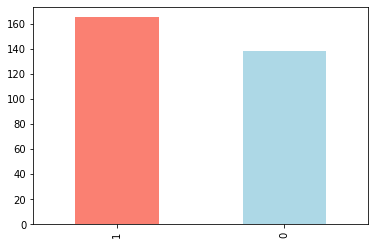

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# compare sex column to the target column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


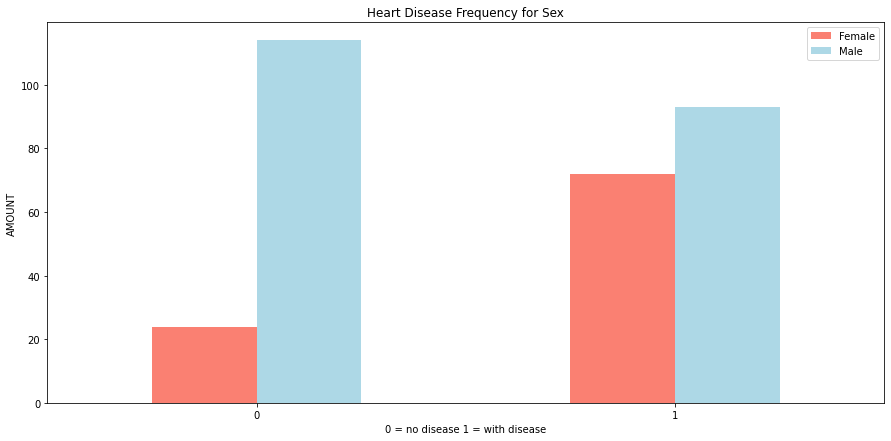

In [10]:
# create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(15, 7), color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = no disease 1 = with disease')
plt.ylabel('AMOUNT')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


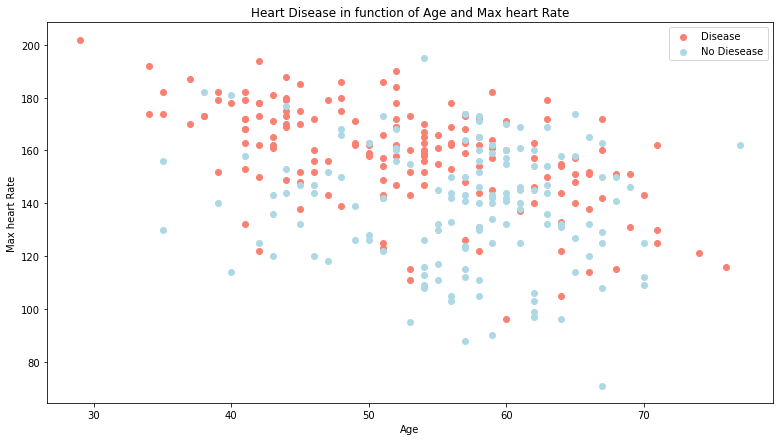

In [12]:
# compare age vs max heart rate for heart disease
# plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.figure(figsize=(13, 7))
plt.scatter(df.age[df.target == 1], df.thalach[df.target ==1], color='salmon');

# scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue');

# add some helper info
plt.title('Heart Disease in function of Age and Max heart Rate')
plt.xlabel('Age')
plt.ylabel('Max heart Rate')
plt.legend(['Disease', 'No Diesease']);

<AxesSubplot:ylabel='Frequency'>

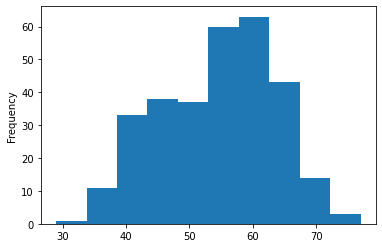

In [13]:
# check the distribution/spread of the age column with histogram
df['age'].plot.hist()

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
# heart disease per chest pain type
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


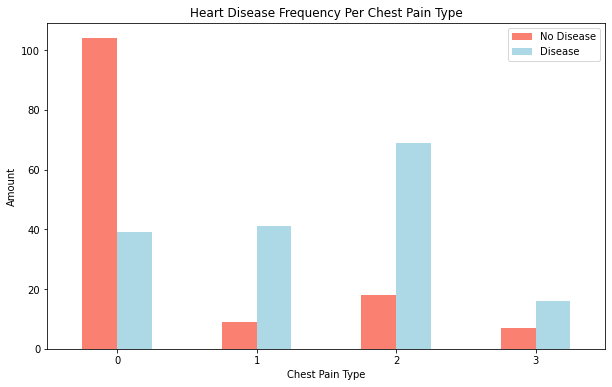

In [16]:
# make the crosstab more visual
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])

# add some communication 
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [17]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


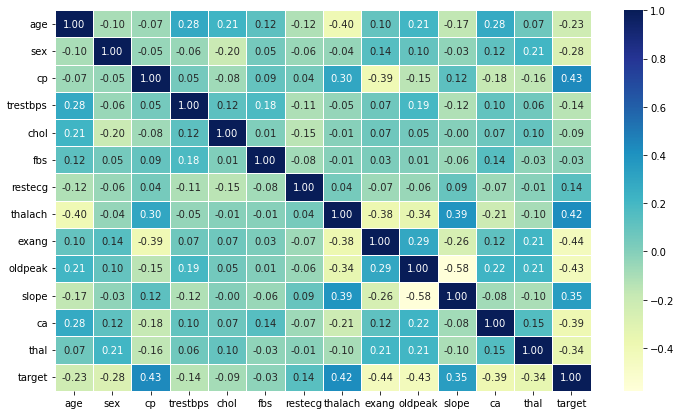

In [18]:
# make a heatmap
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

## 5. Machine Learning Model

In [19]:
# split data
X = df.drop('target', axis=1)
y = df['target']

In [20]:
np.random.seed(42)

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## try 3 different machine learning models
* 1. Logistic Regression
* 2. K-nearest neighbors Classifier
* 3. Random Forest Classifier

In [21]:
# put models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# create a function that will fit and score the machine learning models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dictionary of different scikit-learn machine learning models.
    X_train : training data(no labels)
    X_test : testing data(no labels)
    y_train : training data (labels)
    y_test : testing data (lables)
    """
    np.random.seed(42)
    # dictionary to keep model scores
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit model to the data
        model.fit(X_train, y_train)
        
        # evaluate the model and append its score in the model_scores dictionary
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [22]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\SSA\Desktop\python\data_science\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

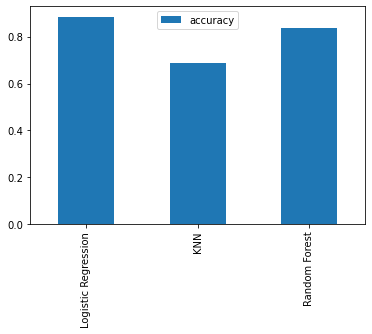

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar');

## Base predictions aren't always the basis for our next step, so what should we do?

### let's look at the following:
* hyperparameter tuning.
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* area under the curve

## Hyperparameter Tuning (KNN) By Hand

In [24]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# KNN instance
knn = KNeighborsClassifier()

# loop through different in n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the machine learning model
    knn.fit(X_train, y_train)
    
    # update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update test score list
    test_scores.append(knn.score(X_test, y_test))
    

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is: 75.41%


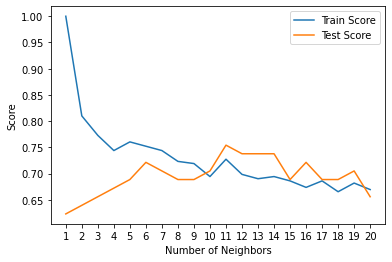

In [27]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21)) # exact same as the n_neighbors we to passed through the loop
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()

print(f'Maximum KNN score on the test data is: {max(test_scores)* 100:.2f}%')

## drop the KNN

## Hyperparameter Tuning with RansdomizedSearchCV

### Tune the following using RandomizedSearchCV:
* `LogisticRegression()`
* `RandomForestClassifier()`



In [28]:
# create hyperparameter grid for LogisticRegression()
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# for RandomForestClassifier()
rf_grid = {
    'n_estimators' : np.arange(10, 1000, 50),
    'max_depth' : [None, 3, 5, 10],
    'min_samples_split' : np.arange(2, 20, 2),
    'min_samples_leaf' : np.arange(1, 20, 2)
}

In [29]:
# tune the LogisticRegression using RandomizedSearchCV()
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
# check best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [32]:
# tune the RandomforestClassifier using RandomizedSearchCV()
np.random.seed(42)
rs_rf_cla = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, n_iter=20, cv=5, verbose=True)

rs_rf_cla.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf_cla.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
rs_rf_cla.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

### Tune the following using GridSearchCV:
* `LogisticRegression()`
* `RandomForestClassifier()`

In [35]:
# create hyperparameter grid for LogisticRegression()
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluate the tuned machine learning classifier, beyond 'accuracy score'

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision, Recall and F1 Score

To evaluate a trained machine learning model, 1st we need to make predictions. 

In [38]:
# make predictions with the tuned machine learning model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
# plot roc curve and calculate the AUC metric
# fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_preds)
# roc_auc = auc(fpr, tpr)
# display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
# display.plot()


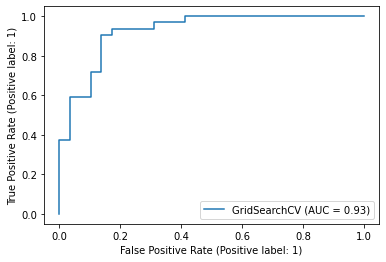

In [40]:

display = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test) 

C:\Users\SSA\Desktop\python\data_science\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


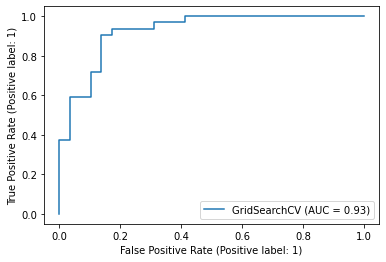

In [41]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [42]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

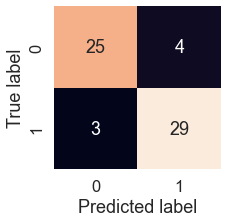

In [44]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test, y_preds):
    """
    Plot a confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_confusion_matrix(y_test, y_preds)


In [45]:
# classification report and a cross-validated precision, recall and f1 score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculate evaluation metrics using cross-validation

### `cross_val_score()`

In [46]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# create new classifier using best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [48]:
# cross-validatated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [49]:
np.mean(cv_acc)

0.8479781420765027

In [50]:
# cross-validatated precission
cv_pre = cross_val_score(clf, X, y, cv=5, scoring='precision')

np.mean(cv_pre)

0.8215873015873015

In [51]:
# cross-validatated recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')

np.mean(cv_rec)

0.9272727272727274

In [52]:
# cross-validatated f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')

np.mean(cv_f1)

0.8705403543192143

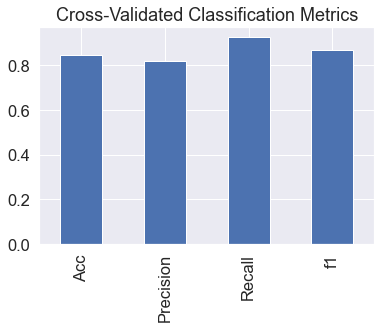

In [53]:
# fix error
# visualize the cross-validated metrics

cv_metrics = pd.DataFrame({
    'Acc' : np.mean(cv_acc),
    'Precision' : np.mean(cv_pre),
    'Recall' : np.mean(cv_rec),
    'f1' : np.mean(cv_f1)
    }, 
    index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False);


## Feature Importance

Which feature contributed most to the outcomes of the machine learning model and how did they contribute?
Finding feature importance is different for each machine learning model.

### One way to find it is to search for "(MODEL NAME) feature importance"
### 

In [58]:
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(X_train, y_train);

In [59]:
# how the indipendent variables contribute to the target?
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [60]:
# match the coef's of features to columns
feature_dictionary = dict(zip(df.columns, list(clf.coef_[0])))
feature_dictionary

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

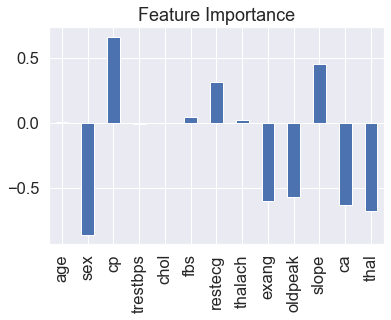

In [61]:
# visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary, index=[0])

feature_df.T.plot(kind='bar', title='Feature Importance', legend=False);

In [62]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation

## If the model didn't achieve the evaluation metric yet:

* 1. Can we collect more data?
* 2. Can we try a better model?
* 3. Can we improve the current models?

## If the model did achieve the evaluation metric:
* 1. Pickle 
* 2. Joblib